# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


In [4]:
cities

['margaret river',
 'papatowai',
 'grytviken',
 'hithadhoo',
 'puerto natales',
 'port-aux-francais',
 'wailua homesteads',
 'lerwick',
 'bilibino',
 'jamestown',
 'iqaluit',
 'waitangi',
 'ushuaia',
 'san patricio',
 'jaumave',
 'puerto ayora',
 'makokou',
 'prince rupert',
 'guiratinga',
 'albany',
 'konarka',
 'adamstown',
 'ilulissat',
 'hoemul-li',
 'rongelap',
 'talakan',
 'livorno',
 'lompoc',
 'codajas',
 'taiohae',
 'zaragoza',
 'kayangel',
 'hamilton',
 'college',
 'kudahuvadhoo',
 'dakhla',
 'sishilichengzi',
 'hawaiian paradise park',
 'nizhneudinsk',
 'tofol',
 'dunedin',
 'tolanaro',
 'edinburgh of the seven seas',
 'georgetown',
 'kalabo',
 'nagqu',
 'kharp',
 'lichinga',
 'souk ahras',
 'port lincoln',
 'gadzhiyevo',
 'vingt cinq',
 'touros',
 'tsetserleg',
 'bokoro',
 'klyuchi',
 'taranagar',
 'bhimunipatnam',
 'codrington',
 'tianpeng',
 'bethel',
 'saint-joseph',
 'lorengau',
 'ahau',
 'anar darah',
 'ta`u',
 'vorgashor',
 'invercargill',
 'olonkinbyen',
 'mata-utu',

In [5]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san francisco")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=ee12669d1d0f60d513bb11238074510b&q=san francisco


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | lerwick
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | jaumave
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | makokou
Processing Record 18 of Set 1 | prince rupert
Processing Record 19 of Set 1 | guiratinga
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | konarka
Processing Record 22 of Set 1 | adamstown
Proce

Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | vilcun
Processing Record 41 of Set 4 | grand-lahou
Processing Record 42 of Set 4 | campbell river
Processing Record 43 of Set 4 | alofi
Processing Record 44 of Set 4 | merowe
Processing Record 45 of Set 4 | vyaz'ma
Processing Record 46 of Set 4 | dawei
Processing Record 47 of Set 4 | saudarkrokur
Processing Record 48 of Set 4 | anatuya
Processing Record 49 of Set 4 | lazaro cardenas
Processing Record 0 of Set 5 | cabo san lucas
Processing Record 1 of Set 5 | fort bragg
Processing Record 2 of Set 5 | shiqian
Processing Record 3 of Set 5 | libreville
Processing Record 4 of Set 5 | margate
Processing Record 5 of Set 5 | wellington
Processing Record 6 of Set 5 | kasongo-lunda
Processing Record 7 of Set 5 | yurty
Processing Record 8 of Set 5 | lihue
Processing Record 9 of Set 5 | coquimbo
Processing Record 10 of Set 5 | kill devil hills
Processing Record 11 of Set 5 | sheridan
Processing Record 12 of Set 5 | vill

Processing Record 31 of Set 8 | nur-sultan
Processing Record 32 of Set 8 | zyryanovsk
Processing Record 33 of Set 8 | manaure
Processing Record 34 of Set 8 | rottweil
Processing Record 35 of Set 8 | bay harbor
Processing Record 36 of Set 8 | kindu
Processing Record 37 of Set 8 | garissa
Processing Record 38 of Set 8 | kushiro
Processing Record 39 of Set 8 | yuzhno-kurilsk
Processing Record 40 of Set 8 | narvik
Processing Record 41 of Set 8 | chita
Processing Record 42 of Set 8 | as sulayyil
Processing Record 43 of Set 8 | la pineda
Processing Record 44 of Set 8 | letterkenny
Processing Record 45 of Set 8 | sitka
Processing Record 46 of Set 8 | shibetsu
Processing Record 47 of Set 8 | princeville
Processing Record 48 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 49 of Set 8 | port sudan
Processing Record 0 of Set 9 | enewetak
Processing Record 1 of Set 9 | al jabin
Processing Record 2 of Set 9 | nasir
Processing Record 3 of Set 9 | nakambala
Processing Record

Processing Record 21 of Set 12 | itoman
Processing Record 22 of Set 12 | toamasina
Processing Record 23 of Set 12 | fisterra
Processing Record 24 of Set 12 | lethem
Processing Record 25 of Set 12 | redencao
Processing Record 26 of Set 12 | girua
Processing Record 27 of Set 12 | kargasok
Processing Record 28 of Set 12 | notodden
Processing Record 29 of Set 12 | chemin grenier
Processing Record 30 of Set 12 | santyoku
Processing Record 31 of Set 12 | yankton
Processing Record 32 of Set 12 | galle
Processing Record 33 of Set 12 | la maddalena
Processing Record 34 of Set 12 | choyr
Processing Record 35 of Set 12 | nova olinda do norte
Processing Record 36 of Set 12 | rabaul
Processing Record 37 of Set 12 | trzebnica
Processing Record 38 of Set 12 | lamu
Processing Record 39 of Set 12 | takoradi
Processing Record 40 of Set 12 | niafunke
Processing Record 41 of Set 12 | volney
Processing Record 42 of Set 12 | celendin
Processing Record 43 of Set 12 | fortuna
Processing Record 44 of Set 12 | 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,13.65,67,95,6.34,AU,1694989695
1,papatowai,-46.5619,169.4708,7.28,87,89,10.42,NZ,1694989695
2,grytviken,-54.2811,-36.5092,-5.49,84,22,6.17,GS,1694989696
3,hithadhoo,-0.6000,73.0833,27.56,80,24,6.99,MV,1694989696
4,puerto natales,-51.7236,-72.4875,2.61,70,74,1.97,CL,1694989696


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv" , index_label="City_ID")

OSError: Cannot save file into a non-existent directory: 'output_data'

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [13]:
time.strftime("%Y-%m-%d")

'2023-09-17'

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

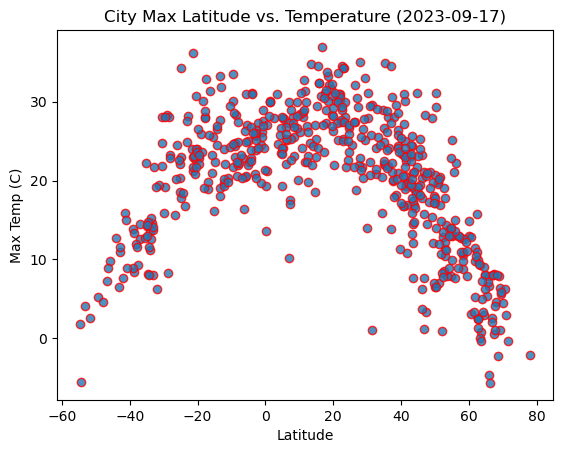

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

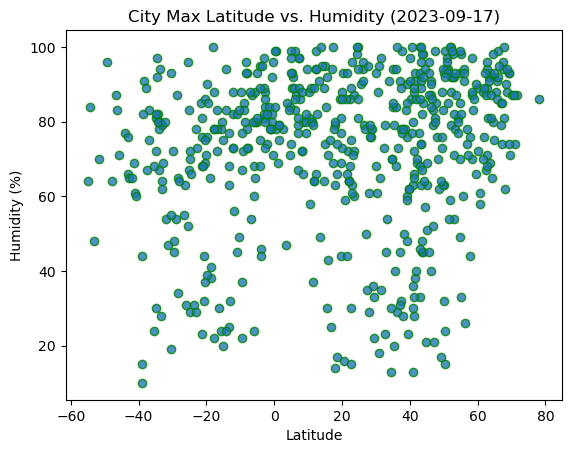

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig3.png'

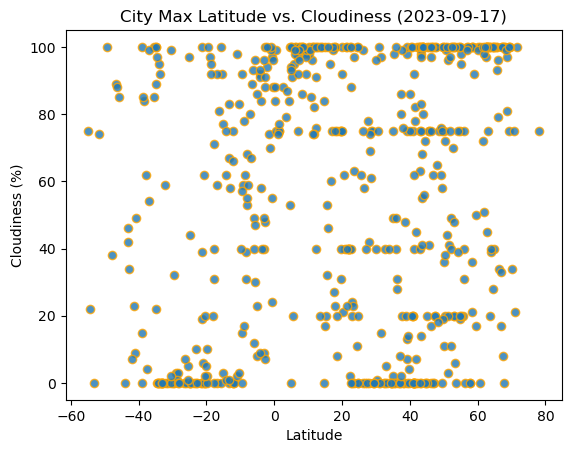

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig4.png'

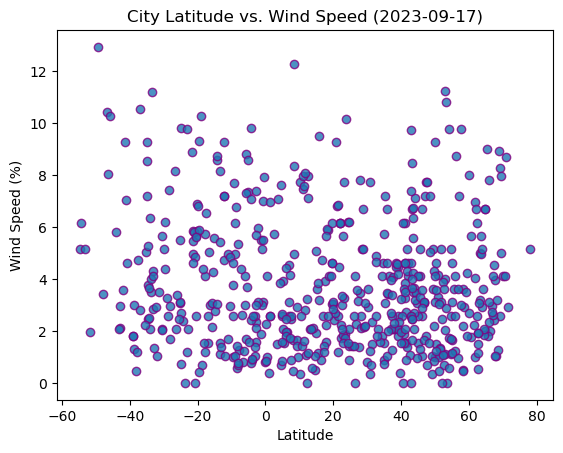

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
ate = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    #Compute linear regresion
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value % slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="yellow")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,wailua homesteads,22.0669,-159.3780,30.24,64,40,6.17,US,1694989697
7,lerwick,60.1545,-1.1494,13.00,89,100,8.02,GB,1694989697
8,bilibino,68.0546,166.4372,4.62,62,100,1.03,RU,1694989697
9,jamestown,42.0970,-79.2353,19.77,69,100,4.12,US,1694989692
10,iqaluit,63.7506,-68.5145,0.85,69,20,5.66,CA,1694989698


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,13.65,67,95,6.34,AU,1694989695
1,papatowai,-46.5619,169.4708,7.28,87,89,10.42,NZ,1694989695
2,grytviken,-54.2811,-36.5092,-5.49,84,22,6.17,GS,1694989696
3,hithadhoo,-0.6000,73.0833,27.56,80,24,6.99,MV,1694989696
4,puerto natales,-51.7236,-72.4875,2.61,70,74,1.97,CL,1694989696


###  Temperature vs. Latitude Linear Regression Plot

In [1]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (2, -3))

NameError: name 'northern_hemi_df' is not defined

The r-value is 0.5444222156014955


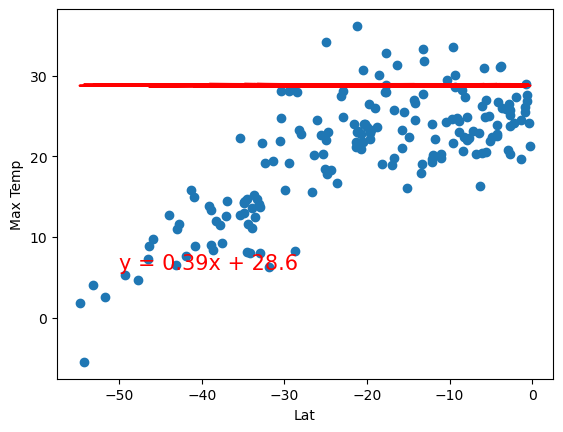

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-50, 6))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.003719645567703252


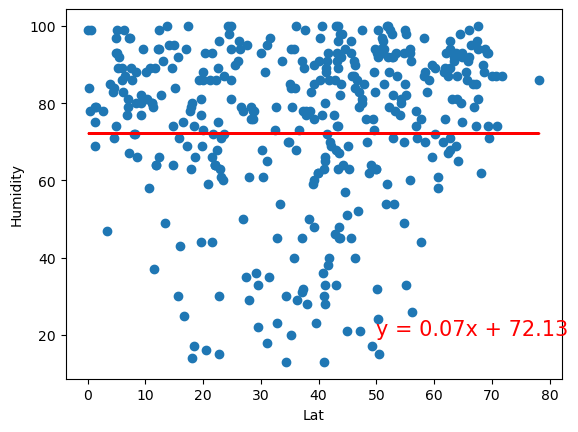

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50, 20))

The r-value is 0.025861358859829143


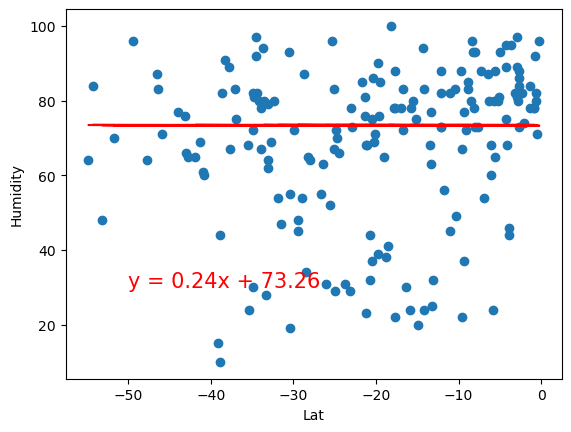

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.00327565873849641


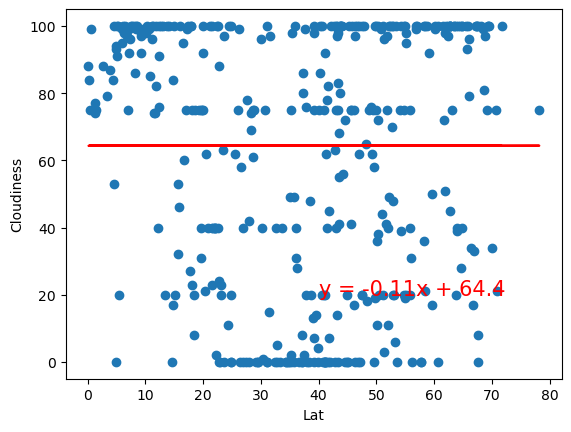

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 20))

The r-value is 0.037017985941302026


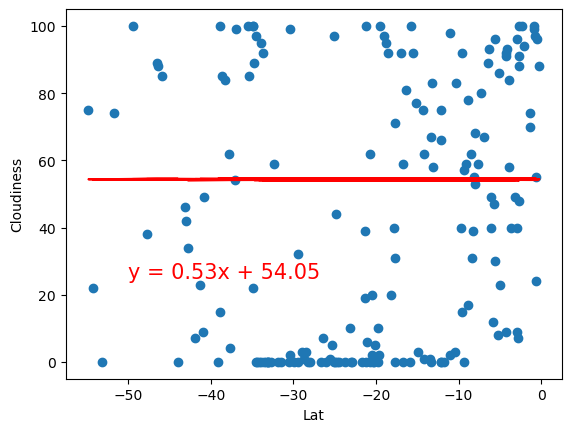

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0032120379824547196


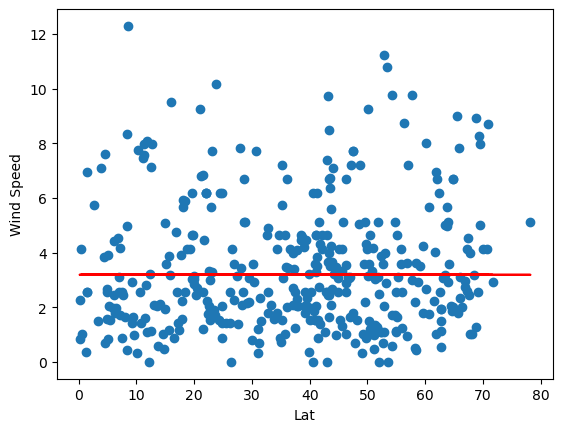

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.019713397725576717


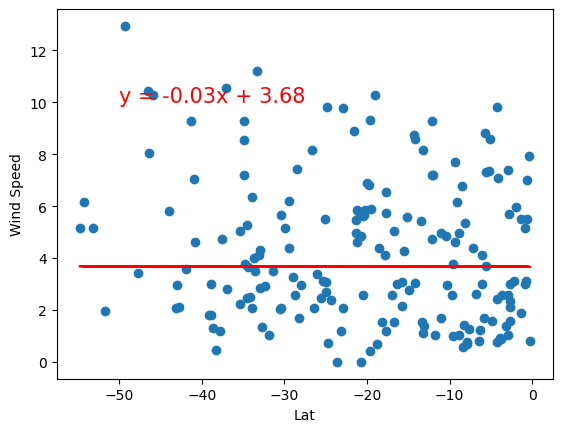

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE